# Coastal change in African countries

* **Products used:** [DE Africa Coastlines]()



## Background

Coastline change can be summarised in country scale to assess trends of change. 

## Description

Coastlines data is downloaded and used for analysis so its not impacted by limited number of features returned by WFS.

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages
Import Python packages that are used for the analysis.

In [2]:
import geopandas as gpd
import rioxarray as rxr
import numpy as np
from deafrica_tools.spatial import xr_rasterize
from deafrica_tools.coastal import get_coastlines
#from deafrica_tools.plotting import display_map
from datacube.utils.geometry import Geometry

from matplotlib import pyplot as plt
import matplotlib as mpl


/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [3]:
african_countries  = gpd.read_file("../Supplementary_data/MGCI/african_countries.geojson")

In [4]:
african_countries.COUNTRY.values

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic',
       'Chad', 'Comoros', 'Congo-Brazzaville', 'Cote d`Ivoire',
       'Democratic Republic of Congo', 'Djibouti', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia',
       'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia',
       'South Africa', 'Sudan', 'Swaziland', 'Tanzania', 'Togo',
       'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe'],
      dtype=object)

In [6]:
#gid_0_coastalchange.NAME_0.values

In [27]:
gid_0_coastalchange  = gpd.read_file("~/dev/data/gadm_africa_coastlineschange_GID_0.gpkg")
gid_0_coastalchange = gid_0_coastalchange.fillna(0)
gid_0_coastalchange = gid_0_coastalchange[gid_0_coastalchange.GID_0_N_good>0]

In [10]:
#gid_0_coastalchange.join(african_countries, on=' [gid_0_coastalchange.NAME_0=='Brazil'].values

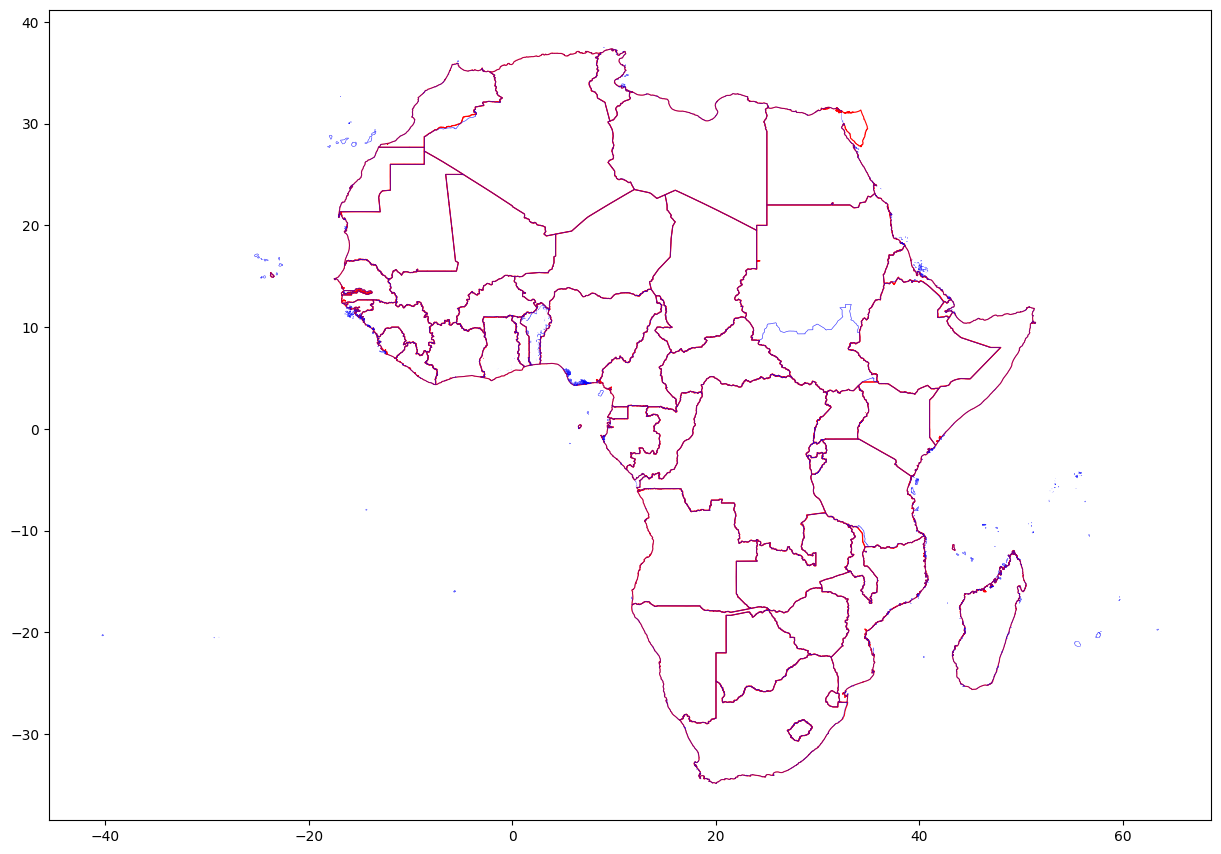

In [11]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
african_countries.geometry.plot(ax=ax, linewidth=0.8, edgecolor='red', facecolor="none");
gid_0_coastalchange.geometry.plot(ax=ax, linewidth=0.4, edgecolor='blue', alpha=0.5, facecolor="none");

In [28]:
gid_0_coastalchange['GID_0_perc_neg1'] = np.round(100* gid_0_coastalchange.GID_0_N_neg1/gid_0_coastalchange.GID_0_N_good).astype(int)

1 40
0 45


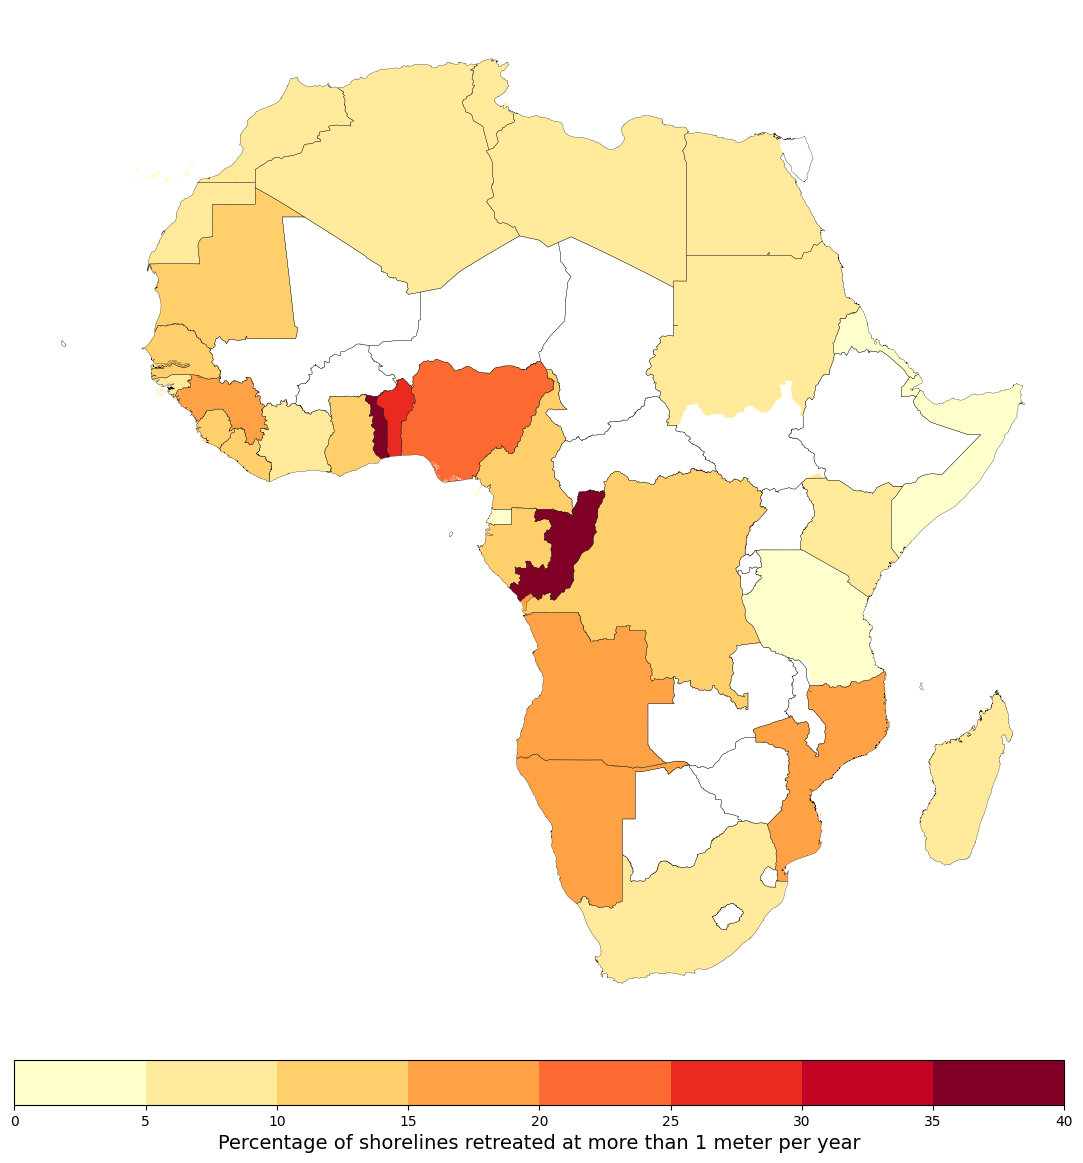

In [32]:
param = 'GID_0_perc_neg1'
title = 'Percentage of shorelines retreated at more than 1 meter per year'

print(gid_0_coastalchange[param].min(), gid_0_coastalchange[param].max())

steps = 5 #np.ceil((gid_1_coastalchange[param].max()/5)/10)*10
vmin, vmax = 0, 45 #np.ceil(gid_1_coastalchange[param].max()/steps)*steps+steps
print(vmin, vmax)

# Define plot and colourbar axes
fig, ax = plt.subplots(1,1, figsize=(15,15))
fig.subplots_adjust(bottom=0.2)
cax = fig.add_axes([0.16, 0.15, 0.70, 0.03])


# Define colour map
cmap = mpl.cm.YlOrRd
bounds = list(np.arange(vmin,vmax,steps))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)#, extend='both')
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')

# Define colourbar labelling
# cbar.set_ticks([])
cbar.set_ticks(bounds)
ticklabels= list('{:.0f}'.format(i) for i in bounds)
#ticklabels[-1]=f">{ticklabels[-1]}"
cbar.set_ticklabels(ticklabels)
cbar.set_label(title, fontsize='14')

# Turn off lon-lat ticks and labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

# # Remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

gid_0_coastalchange.plot(param, ax=ax, cmap=cmap, norm=norm);
#gid_1_coastalchange.geometry.plot(ax=ax, linewidth=0.2, edgecolor='black', facecolor="none");
#gid_0_coastalchange.simplify(0.05).geometry.plot(ax=ax, linewidth=0.2, edgecolor='black', facecolor="none");
african_countries.geometry.plot(ax=ax, linewidth=0.2, edgecolor='black', facecolor="none");

fig.savefig(f"{param}.png", bbox_inches='tight')

0.36 789.57
0 880.0


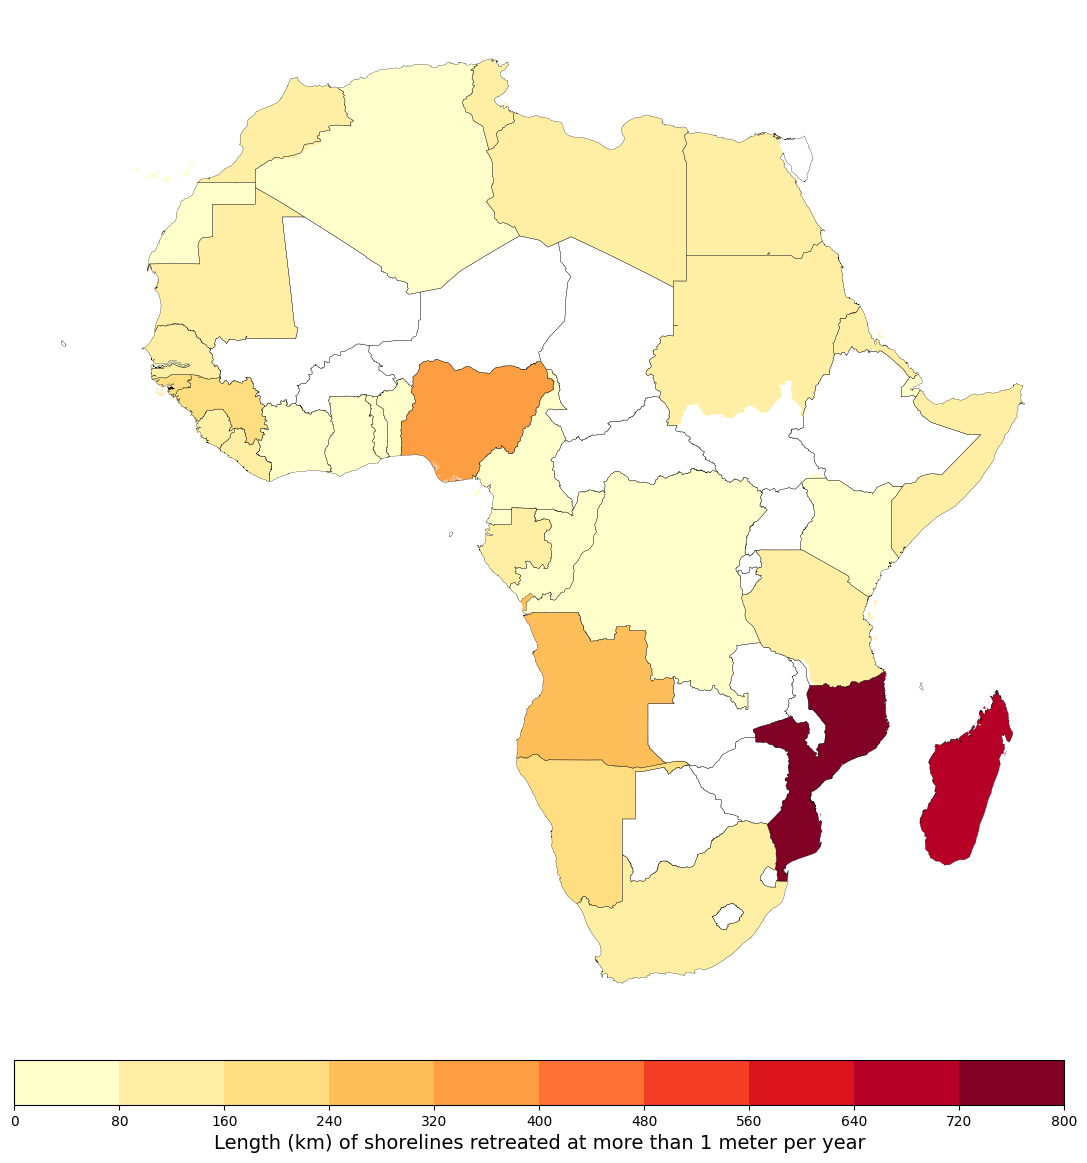

In [33]:
param = 'GID_0_km_neg1'
title = 'Length (km) of shorelines retreated at more than 1 meter per year'

print(gid_0_coastalchange[param].min(), gid_0_coastalchange[param].max())

steps = np.ceil((gid_0_coastalchange[param].max()/10)/10)*10
vmin, vmax = 0, np.ceil(gid_0_coastalchange[param].max()/steps)*steps+steps
print(vmin, vmax)

# Define plot and colourbar axes
fig, ax = plt.subplots(1,1, figsize=(15,15))
fig.subplots_adjust(bottom=0.2)
cax = fig.add_axes([0.16, 0.15, 0.70, 0.03])


# Define colour map
cmap = mpl.cm.YlOrRd
bounds = list(np.arange(vmin,vmax,steps))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)#, extend='both')
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')

# Define colourbar labelling
# cbar.set_ticks([])
cbar.set_ticks([i for i in np.arange(vmin,vmax,steps)])
cbar.set_ticklabels(list('{:.0f}'.format(i) for i in (list(np.arange(vmin, vmax, steps)))))
cbar.set_label(title, fontsize='14')

# Turn off lon-lat ticks and labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

# # Remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

gid_0_coastalchange.plot(param, ax=ax, cmap=cmap, norm=norm);
#gid_1_coastalchange.geometry.plot(ax=ax, linewidth=0.2, edgecolor='black', facecolor="none");
#gid_0_coastalchange.simplify(0.05).geometry.plot(ax=ax, linewidth=0.2, edgecolor='black', facecolor="none");
african_countries.geometry.plot(ax=ax, linewidth=0.2, edgecolor='black', facecolor="none");


fig.savefig(f"{param}.png", bbox_inches='tight')

In [12]:
gid_1_coastalchange  = gpd.read_file("~/dev/data/gadm_africa_coastlineschange_GID_1_good.gpkg")
gid_1_coastalchange = gid_1_coastalchange.fillna(0)

In [13]:
gid_1_coastalchange['GID_1_perc_neg1'] = np.round(100* gid_1_coastalchange.GID_1_N_neg1/gid_1_coastalchange.GID_1_N_good).astype(int)

In [14]:
gid_1_coastalchange['ENGTYPE_1'].unique()

array(['Province', 'Department', 'Region', 'Autonomous district',
       'District', 'Governorate', 'Independent City', 'Division', '',
       'Autonomous Sector', 'County', 'State', 'Autonomous City'],
      dtype=object)

0 81
0 55


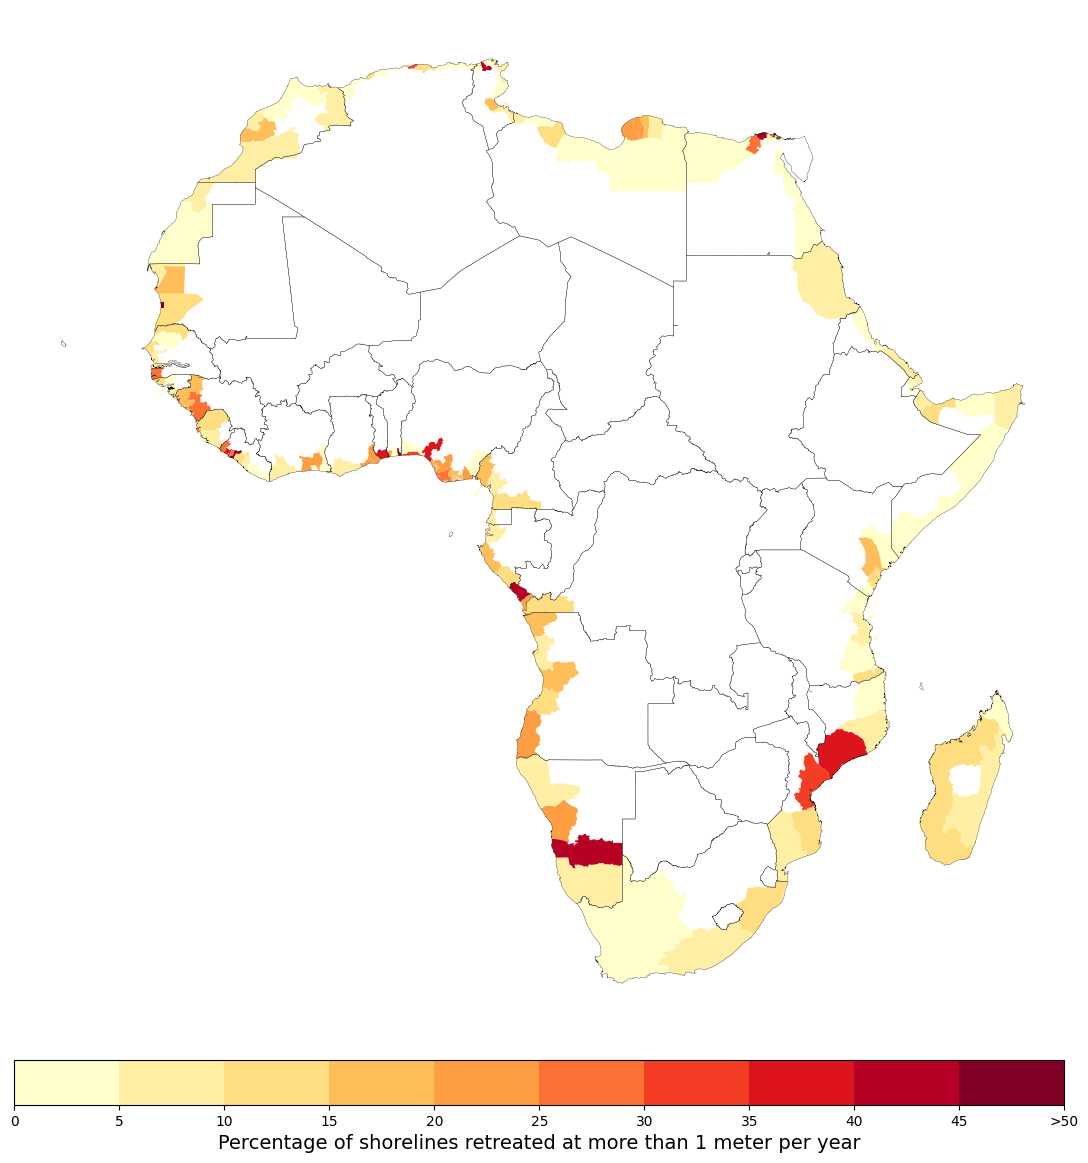

In [21]:
param = 'GID_1_perc_neg1'
title = 'Percentage of shorelines retreated at more than 1 meter per year'

print(gid_1_coastalchange[param].min(), gid_1_coastalchange[param].max())

steps = 5 #np.ceil((gid_1_coastalchange[param].max()/5)/10)*10
vmin, vmax = 0, 55 #np.ceil(gid_1_coastalchange[param].max()/steps)*steps+steps
print(vmin, vmax)

# Define plot and colourbar axes
fig, ax = plt.subplots(1,1, figsize=(15,15))
fig.subplots_adjust(bottom=0.2)
cax = fig.add_axes([0.16, 0.15, 0.70, 0.03])


# Define colour map
cmap = mpl.cm.YlOrRd
bounds = list(np.arange(vmin,vmax,steps))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)#, extend='both')
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')

# Define colourbar labelling
# cbar.set_ticks([])
cbar.set_ticks(bounds)
ticklabels= list('{:.0f}'.format(i) for i in bounds)
ticklabels[-1]=f">{ticklabels[-1]}"
cbar.set_ticklabels(ticklabels)
cbar.set_label(title, fontsize='14')

# Turn off lon-lat ticks and labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

# # Remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

gid_1_coastalchange.plot(param, ax=ax, cmap=cmap, norm=norm);
#gid_1_coastalchange.geometry.plot(ax=ax, linewidth=0.2, edgecolor='black', facecolor="none");
#gid_0_coastalchange.simplify(0.05).geometry.plot(ax=ax, linewidth=0.2, edgecolor='black', facecolor="none");
african_countries.geometry.plot(ax=ax, linewidth=0.2, edgecolor='black', facecolor="none");


fig.savefig(f"{param}.png", bbox_inches='tight')

0.0 285.15
0 330.0


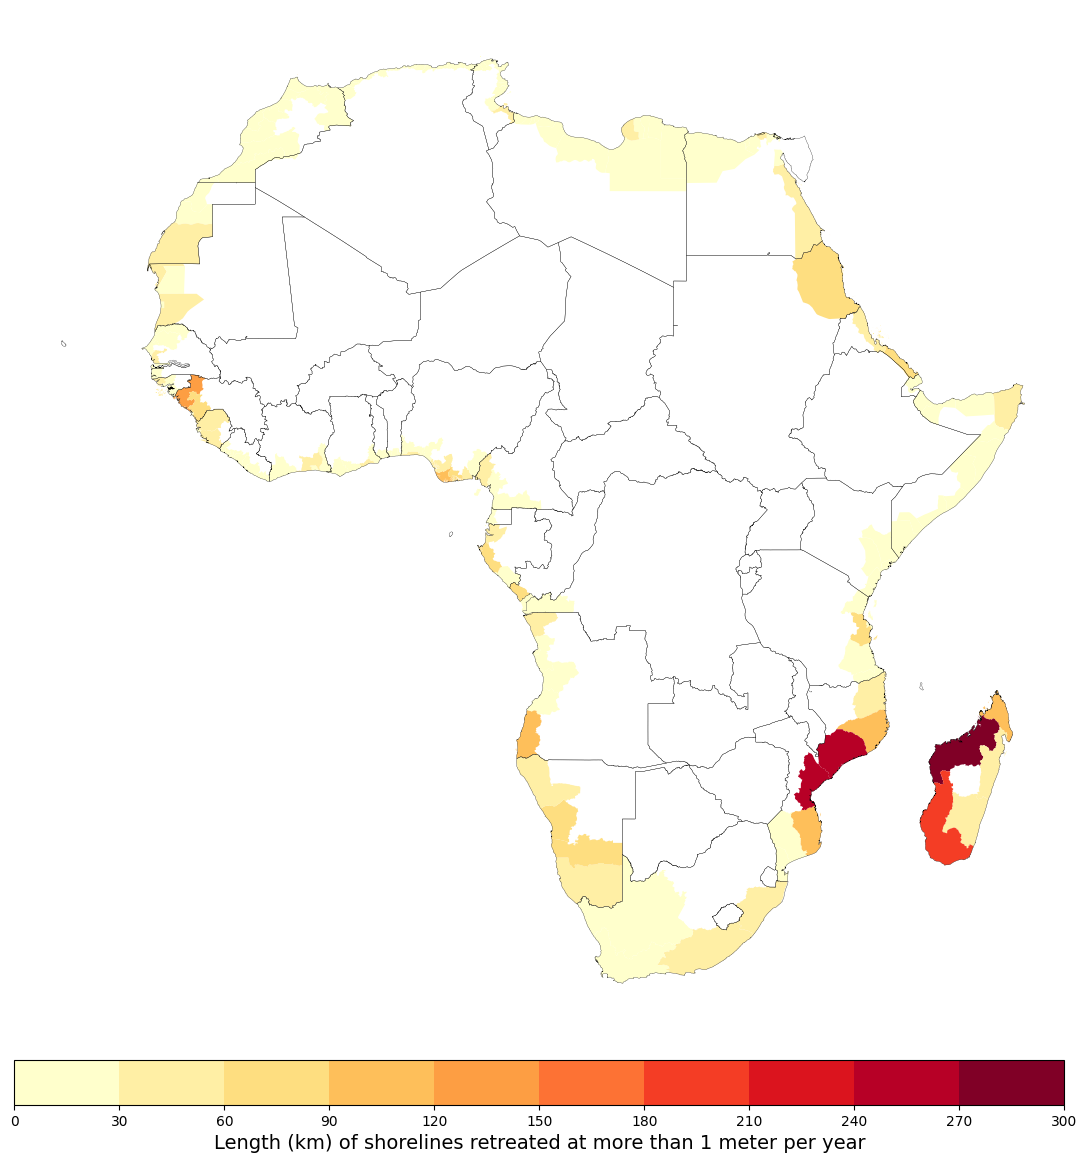

In [22]:
param = 'GID_1_km_neg1'
title = 'Length (km) of shorelines retreated at more than 1 meter per year'

print(gid_1_coastalchange[param].min(), gid_1_coastalchange[param].max())

steps = np.ceil((gid_1_coastalchange[param].max()/10)/10)*10
vmin, vmax = 0, np.ceil(gid_1_coastalchange[param].max()/steps)*steps+steps
print(vmin, vmax)

# Define plot and colourbar axes
fig, ax = plt.subplots(1,1, figsize=(15,15))
fig.subplots_adjust(bottom=0.2)
cax = fig.add_axes([0.16, 0.15, 0.70, 0.03])


# Define colour map
cmap = mpl.cm.YlOrRd
bounds = list(np.arange(vmin,vmax,steps))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)#, extend='both')
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')

# Define colourbar labelling
# cbar.set_ticks([])
cbar.set_ticks([i for i in np.arange(vmin,vmax,steps)])
cbar.set_ticklabels(list('{:.0f}'.format(i) for i in (list(np.arange(vmin, vmax, steps)))))
cbar.set_label(title, fontsize='14')

# Turn off lon-lat ticks and labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

# # Remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

gid_1_coastalchange.plot(param, ax=ax, cmap=cmap, norm=norm);
#gid_1_coastalchange.geometry.plot(ax=ax, linewidth=0.2, edgecolor='black', facecolor="none");
#gid_0_coastalchange.simplify(0.05).geometry.plot(ax=ax, linewidth=0.2, edgecolor='black', facecolor="none");
african_countries.geometry.plot(ax=ax, linewidth=0.2, edgecolor='black', facecolor="none");


fig.savefig(f"{param}.png", bbox_inches='tight')